,date,new,total,recovered,average,active,hospitalised,intensive care,ventilated,dead,tests,day,day_str
2,2021-08-13,2.0,6.0,0.0,0.857143,6.0,0.0,0.0,0.0,0.0,1329.0,4,FRI
3,2021-08-14,1.0,7.0,0.0,1.000000,7.0,0.0,0.0,0.0,0.0,1982.0,5,SAT
4,2021-08-15,2.0,9.0,0.0,1.285714,9.0,0.0,0.0,0.0,0.0,3292.0,6,SUN
5,2021-08-16,18.0,27.0,0.0,3.857143,27.0,0.0,0.0,0.0,0.0,6444.0,0,MON
6,2021-08-17,17.0,44.0,0.0,6.285714,44.0,0.0,0.0,0.0,0.0,6369.0,1,TUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2021-12-29,138.0,3223.0,2183.0,139.857143,1028.0,4.0,0.0,0.0,0.0,3041.0,2,WED
141,2021-12-30,253.0,3476.0,2330.0,163.857143,1134.0,6.0,0.0,0.0,0.0,3996.0,3,THU
142,2021-12-31,462.0,3938.0,2268.0,215.285714,1658.0,6.0,0.0,0.0,0.0,4211.0,4,FRI
143,2022-01-01,448.0,4386.0,2895.0,259.000000,1479.0,9.0,0.0,0.0,0.0,3141.0,5,SAT


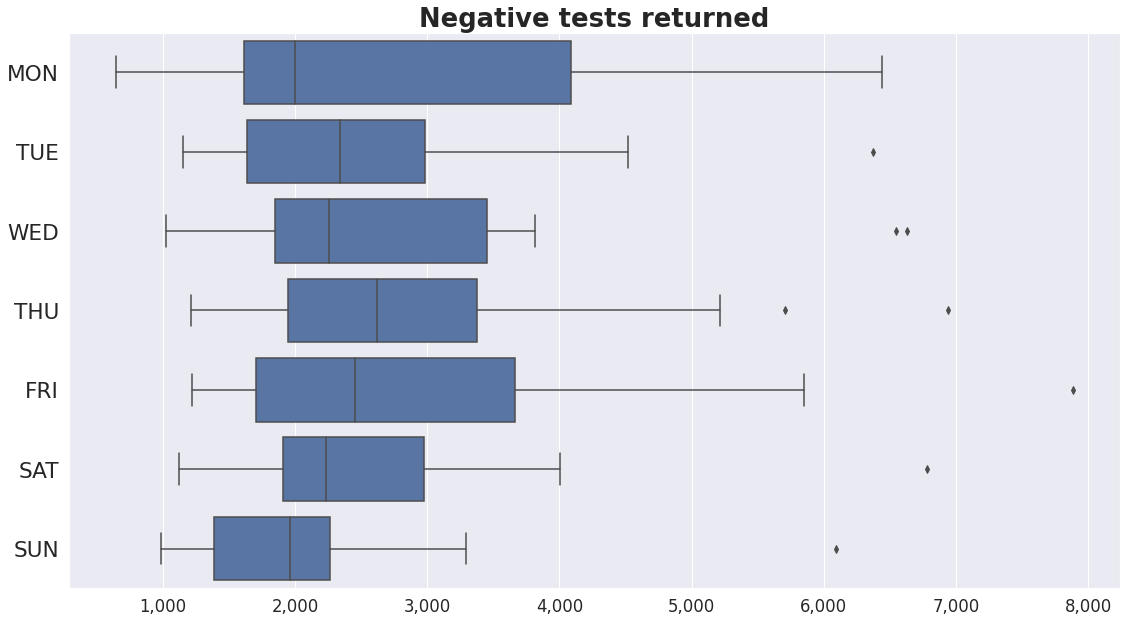

In [6]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, matplotlib.ticker as ticker, matplotlib.dates as mdates
sns.set(style="darkgrid", font_scale=1.5)

data = pd.read_csv("caseData.csv", parse_dates=["date"])
data["tests"] = data["tests"].apply(lambda x: np.nan if x == 0 else x)
data = data.dropna()
data.drop(data[data["tests"] == 0].index, inplace=True)
data["day"] = data.date.dt.dayofweek
days = ["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"]
data["day_str"] = data["day"].apply(lambda x: days[x])

fig, ax = plt.subplots(
    figsize=(16, 9),
    tight_layout=True
)
sns.boxplot(data=data.sort_values("day"), x="tests", y="day_str", color="#4c72b0")
plt.title("Negative tests returned", fontsize="x-large", fontweight="bold")
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(fontsize="large")
ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: f"{int(x):,}"))
plt.savefig("daysofweek.jpg")
data

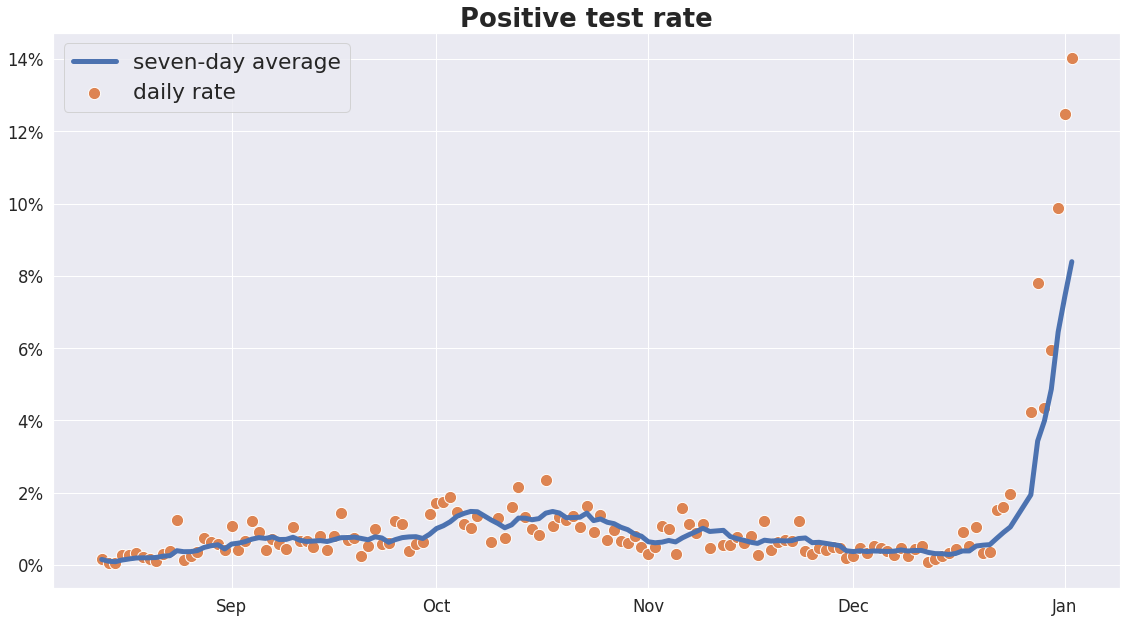

In [8]:
data["rate"] = data.new / (data.tests + data.new)
for i in data.index:
    temp = data[(data["date"] > data.at[i, "date"] - pd.Timedelta(days=7)) & (data["date"] <= data.at[i, "date"])]
    data.at[i, "trend"] = temp["rate"].mean()
    
df = data[["date", "rate", "trend"]].set_index("date")

df.columns = ["daily rate", "seven-day average"]
fig, ax = plt.subplots(
    figsize=(16, 9),
    tight_layout=True
)

sns.scatterplot(data=df, x=df.index, y="daily rate", ax=ax, s=150, label="daily rate", color="#dd8452")
sns.lineplot(data=df, x=df.index, y="seven-day average", ax=ax, linewidth=5, label="seven-day average")
plt.title("Positive test rate", fontsize="x-large", fontweight="bold")
plt.ylabel(None)
plt.xlabel(None)
plt.legend(fontsize="large")
ax.get_yaxis().set_major_formatter(ticker.PercentFormatter(1, 0))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b"))
plt.savefig("testingrate.jpg")

# for i, indice in enumerate(data.index):
#     data.at[indice, "trend_test"] = data.iloc[max(i - 6, 0):i + 1]["tests"].mean()
# df = data[["date", "tests", "trend_test"]].set_index("date")
# df.columns = ["daily tests", "seven-day average"]
# fig, ax = plt.subplots(
#     figsize=(12, 6.75),
#     tight_layout=True
# )
# sns.scatterplot(data=df, x=df.index, y="daily tests", ax=ax, linewidth=3, s=100, label="daily tests", color="#dd8452")
# sns.lineplot(data=df, x=df.index, y="seven-day average", ax=ax, linewidth=3, label="seven-day average")
# plt.title("Negative tests returned", fontsize="large", fontweight="bold")
# plt.ylabel(None)
# plt.xlabel(None)
# plt.legend(fontsize="large")
# ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: f"{int(x):,}"))
# ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %-d"))
# plt.savefig("testingnos.jpg")

In [8]:
data.iloc[-3:].rate.mean()

0.05460147225795244